In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('copy_web_scraping_final.csv')

In [43]:
#df.info()
df.shape

(988, 71)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()

#drop 'lifetime_gross' because that is the target (y value) value 
X, y = df.drop(['lifetime_gross', 'rank', 'release date','title','link_stub','key_0','genre'], axis=1), df['lifetime_gross']

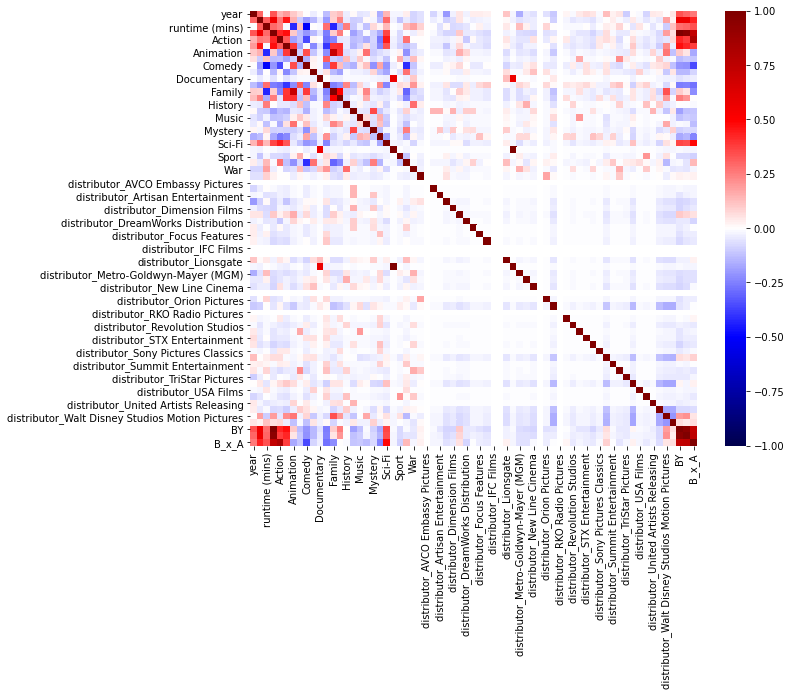

In [41]:
#heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(X.corr(), cmap="seismic", vmin=-1, vmax=1);
plt.savefig("movie_features_heatmap.png")

In [6]:
# split data

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=8)

In [7]:
#60%
X_train.shape

(632, 64)

In [8]:
#20%
X_val.shape

(158, 64)

In [9]:
#20%
X_test.shape

(198, 64)

In [10]:
from sklearn.model_selection import (cross_val_score, train_test_split)

scores = cross_val_score(lm, X_train, y_train)
print("Linear Reg Mean Score: ", round(np.mean(scores),3))

Linear Reg Mean Score:  0.795


In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [45]:
#validate and score

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 Polynomial Regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Degree 2  Polynomial Regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')

X_val_lasso = std.transform(X_val.values)
print(f'Lasso CV Regression val R^2: {lasso_model.score(X_val_lasso, y_val):.3f}')
print(f'Lasso CV Regression train R^2: {lasso_model.score(X_train_lasso, y_train):.3f}')

Linear Regression val R^2: 0.816
Linear Regression train R^2: 0.841
Ridge Regression val R^2: 0.825
Ridge Regression train R^2: 0.841
Degree 2 Polynomial Regression val R^2: 0.161
Degree 2  Polynomial Regression train R^2: 0.465
Lasso CV Regression val R^2: 0.816
Lasso CV Regression train R^2: 0.841


In [14]:
#scale X matrix then lasso CV (finds optimal alpha)
# Scale the data
std = StandardScaler()
std.fit(X_train.values)

# Scale the Predictors on both the train
X_train_lasso = std.transform(X_train.values)

In [15]:
from sklearn.linear_model import LassoCV
#find the best alpha, refit model on all the data with alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_lasso, y_train)

/Users/sheraleelovejoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.871467435975936e+16, tolerance: 549514372215009.94
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sheraleelovejoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8714525782754816e+16, tolerance: 549514372215009.94
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sheraleelovejoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2031310553060224e+16, tolerance: 549514372215009.94
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sher

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [16]:
'''X_val_lasso = std.transform(X_val.values)
print(f'Lasso CV Regression val R^2: {lasso_model.score(X_val_lasso, y_val):.3f}')
print(f' Lasso CV Regression train R^2: {lasso_model.score(X_train_lasso, y_train):.3f}')'''

Lasso CV Regression val R^2: 0.816
 Lasso CV Regression train R^2: 0.841


In [17]:
len(list(zip(X_train.columns, lasso_model.coef_)))

64

In [22]:
#create poly features
#X['BR'] = X['budget'] * X['runtime (mins)']
#X['B2'] = X['budget'] ** 2
#X['B_/_R'] = X['budget'] / X['runtime (mins)']
X['B_x_A'] = X['budget'] * X['Action']

In [23]:
scores = cross_val_score(lm_reg, X_train_scaled, y_train)
print("Ridge Reg Mean Score: ", round(np.mean(scores),3))

Ridge Reg Mean Score:  0.797


In [28]:
#refit to model then plot
X_refit = scaler.fit_transform(X.values)
lm_reg.fit(X_refit, y)
print(round(lm_reg.score(X_refit, y),3))
lm_reg.coef_

0.843


array([-8.86617873e+06,  9.57096710e+07, -7.79200069e+05, -4.73661479e+06,
        8.56878449e+06, -5.32080673e+06, -4.17063705e+05,  1.99645517e+06,
        5.31599372e+06,  3.73708758e+05, -1.75388798e+06, -4.55200294e+05,
       -2.66404268e+06, -8.55660319e+05, -1.23899434e+06, -1.04822536e+06,
        9.89708848e+04,  5.45855092e+04, -1.10677685e+06, -3.38023275e+06,
        4.77897116e+06, -1.52079966e+05,  6.99000456e+05, -5.35573459e+06,
        2.17145052e+06,  5.50474065e+05,  0.00000000e+00, -1.21587175e+06,
       -1.09400721e+06, -5.11026927e+06, -4.61677425e+06, -5.11209442e+06,
       -2.49153995e+06, -1.41085010e+06, -2.51077799e+06, -3.87551558e+06,
        0.00000000e+00,  0.00000000e+00, -1.33335099e+06, -1.52079966e+05,
       -4.92371859e+06, -3.50300486e+06, -4.15028002e+06,  0.00000000e+00,
       -2.14083089e+06, -1.19734330e+07,  0.00000000e+00, -2.02046783e+06,
       -2.24689406e+06, -1.01136293e+06, -1.17014377e+06, -1.78226369e+06,
       -9.36278322e+05, -

In [32]:
# Make predictions on the test set using the new model
preds = lm_reg.predict(X)

In [39]:
#rmse; better to talk about performance ('error = predictions were off on avg by $')
def RMSE(actuals, preds): 
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y,preds)

2.4190802445964955e+23